# Lecture 10

## Exercise 10.1: TSP with Simulated Annealing

We want to resolve the Traveling Salesman Problem (TSP) with a Simulated Annealing (SA) code. We use the $L_2[\vec{r}]$ norm as an "energy" and sample a Boltzmann-like distribution $p=e^{-\beta L_2[\vec{r}]}$ with Metropolis. At high temperature, the salesman will be free to move and take paths of any length, while lowering T he will be forced to take shorter and shorter paths. The freezing process is implemented by modifing $\beta$ following a cooling schedule. Here the schedule is very simple: we start with $\beta=0,9$ and every $1000$ steps we divide it by the cooling rate $r=0,9$. The path is made up of $N=32$ cities and the algorithm works for $10^5$ steps.

The class <font face="Courier">individual</font> is the same of the previous Lecture, while <font face="Courier">population</font> has been modified: <font face="Courier">next_gen</font> now proposes some mutations and accepts the new path with Metropolis. The mutation rates are again $0,1$ for permutations, $0,07$ for block permutations, $0,05$ for shifts and inversions and we can have at most 2 permutations, a block permutation, a shift and an inversion. Since the population is made up by only one individual, there won't be any crossover.

We place again the cities on a circumference of radius $r=1$ and inside a square of side $l=2$, plot the length as a function of the step and compare the results for the final path with the ones from *exercise 9.1*.

### cities on a circumference

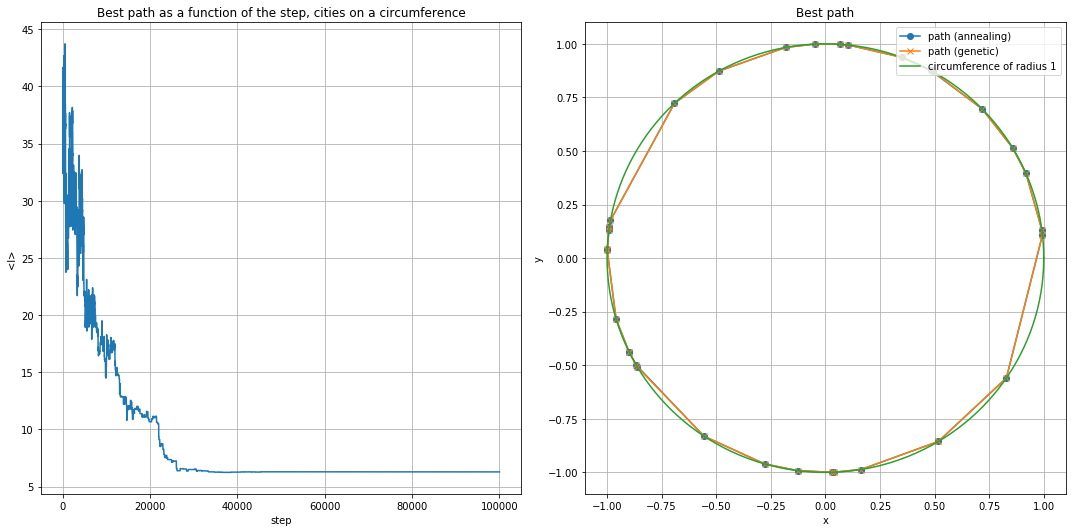

In [21]:
import numpy as np
import matplotlib.pyplot as plt

c_gen,c_len=np.loadtxt("es10.1/TSP_L2_cir.txt", usecols=(0,1), unpack='true')
c_x_an,c_y_an=np.loadtxt("es10.1/TSP_L2_cir_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
c_x_gen,c_y_gen=np.loadtxt("../Lez9/es9.1/TSP_L2_cir_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(15,7.5))

plt.subplot(121)
plt.plot(c_gen,c_len)
plt.title("Best path as a function of the step, cities on a circumference")
plt.xlabel("step")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x_an,c_y_an,'-o',label='path (annealing)')
plt.plot(c_x_gen,c_y_gen,'-x',label='path (genetic)')
plt.plot(x,y,label='circumference of radius 1')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()

### cities inside a square

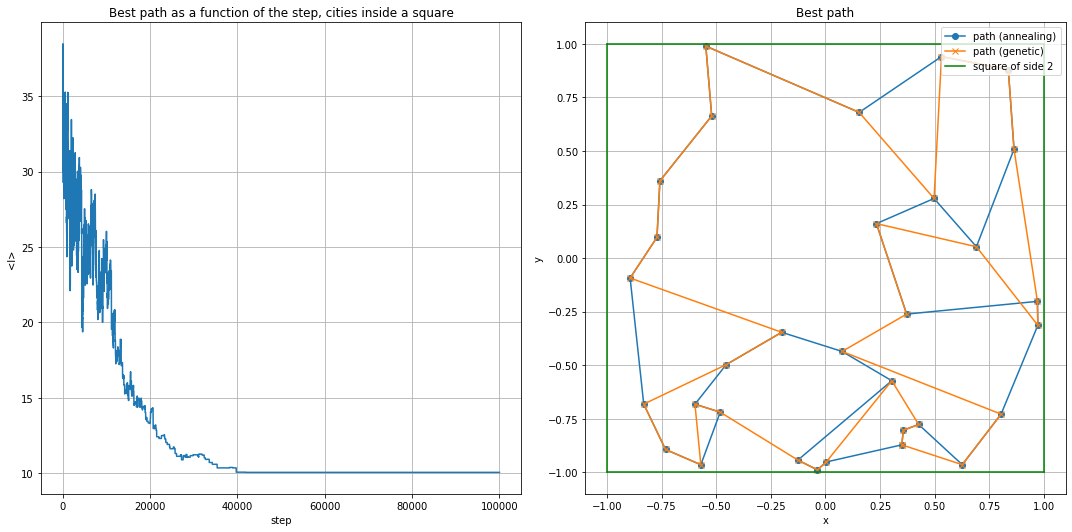

In [22]:
s_gen,s_len=np.loadtxt("es10.1/TSP_L2_sq.txt", usecols=(0,1), unpack='true')
s_x_an,s_y_an=np.loadtxt("es10.1/TSP_L2_sq_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
s_x_gen,s_y_gen=np.loadtxt("../Lez9/es9.1/TSP_L2_sq_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
plt.figure(0,figsize=(15,7.5))

plt.subplot(121)
plt.plot(s_gen,s_len)
plt.title("Best path as a function of the step, cities inside a square")
plt.xlabel("step")
plt.ylabel("<l>")
plt.grid(True)

plt.subplot(122)
plt.plot(s_x_an,s_y_an,'-o',label='path (annealing)')
plt.plot(s_x_gen,s_y_gen,'-x',label='path (genetic)')
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(x,x_left,color='green',label='square of side 2')
plt.plot(x,x_right,color='green')
plt.plot(x_right,x,color='green')
plt.plot(x_left,x,color='green')
plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()

## Exercise 10.2: Parallel TSP

We solve the TSP using a GA, under the same conditions of *exercise 9.1*: $N_{pop}=200$ possible paths of $N=32$ cities that can evolve for 2000 generations. This time we run 4 parallel optimizations: each continent (a node) will perform an indipendent GA search with different cities but every $N_{mig}=100$ generations, the best individual migrates from a continent to another, chosen ranbomly. This time we increase the mutation rates and the max number of mutations per generation: $0,15$ for permutations, $0,1$ for block permutations, $0,09$ for shifts and inversions and $0,75$ for crossovers, with at most $N_{pop}$ permutations, $N_{pop}/2$ block permutations, $N_{pop}/4$ shifts, inversions and crossovers.

### cities on a circumference

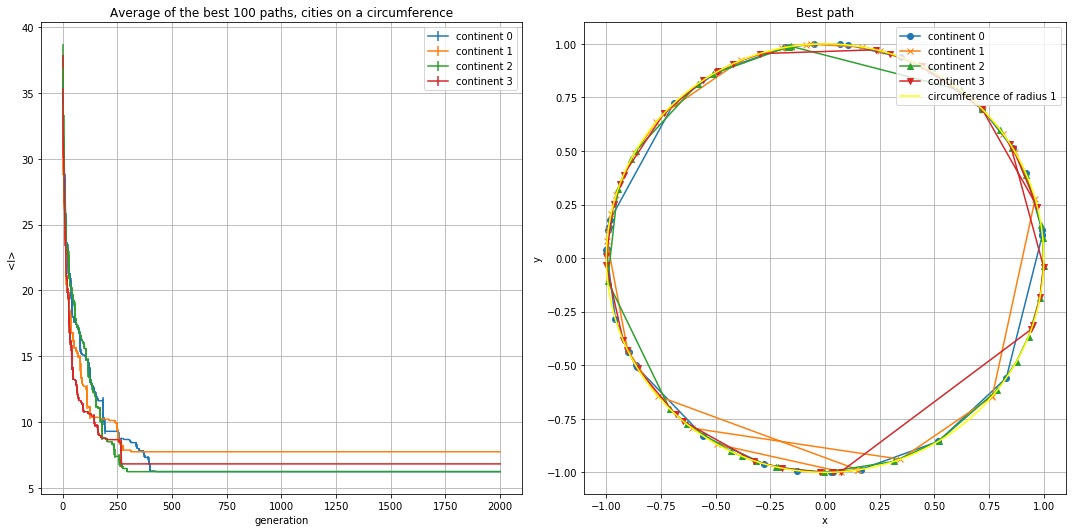

In [24]:
c_gen,c_ave_0,c_err_0=np.loadtxt("es10.2/History/0_TSP_L2_cir_ave.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
c_ave_1,c_err_1=np.loadtxt("es10.2/History/1_TSP_L2_cir_ave.txt", usecols=(1,2), delimiter=" ", unpack='true')
c_ave_2,c_err_2=np.loadtxt("es10.2/History/2_TSP_L2_cir_ave.txt", usecols=(1,2), delimiter=" ", unpack='true')
c_ave_3,c_err_3=np.loadtxt("es10.2/History/3_TSP_L2_cir_ave.txt", usecols=(1,2), delimiter=" ", unpack='true')

c_x_0,c_y_0=np.loadtxt("es10.2/Best/0_TSP_L2_cir_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
c_x_1,c_y_1=np.loadtxt("es10.2/Best/1_TSP_L2_cir_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
c_x_2,c_y_2=np.loadtxt("es10.2/Best/2_TSP_L2_cir_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
c_x_3,c_y_3=np.loadtxt("es10.2/Best/3_TSP_L2_cir_best.txt", usecols=(1,2), delimiter=" ", unpack='true')

plt.figure(0,figsize=(15,7.5))

plt.subplot(121)
plt.errorbar(c_gen,c_ave_0,yerr=c_err_0, label="continent 0")
plt.errorbar(c_gen,c_ave_1,yerr=c_err_1, label="continent 1")
plt.errorbar(c_gen,c_ave_2,yerr=c_err_2, label="continent 2")
plt.errorbar(c_gen,c_ave_3,yerr=c_err_3, label="continent 3")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(122)
theta=np.linspace(0,2*np.pi,500)
radius=1
x=radius*np.cos(theta)
y=radius*np.sin(theta)
plt.plot(c_x_0,c_y_0,'-o',label='continent 0')
plt.plot(c_x_1,c_y_1,'-x',label='continent 1')
plt.plot(c_x_2,c_y_2,'-^',label='continent 2')
plt.plot(c_x_3,c_y_3,'-v',label='continent 3')
plt.plot(x,y,label='circumference of radius 1', color="yellow")
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()

### cities inside a square

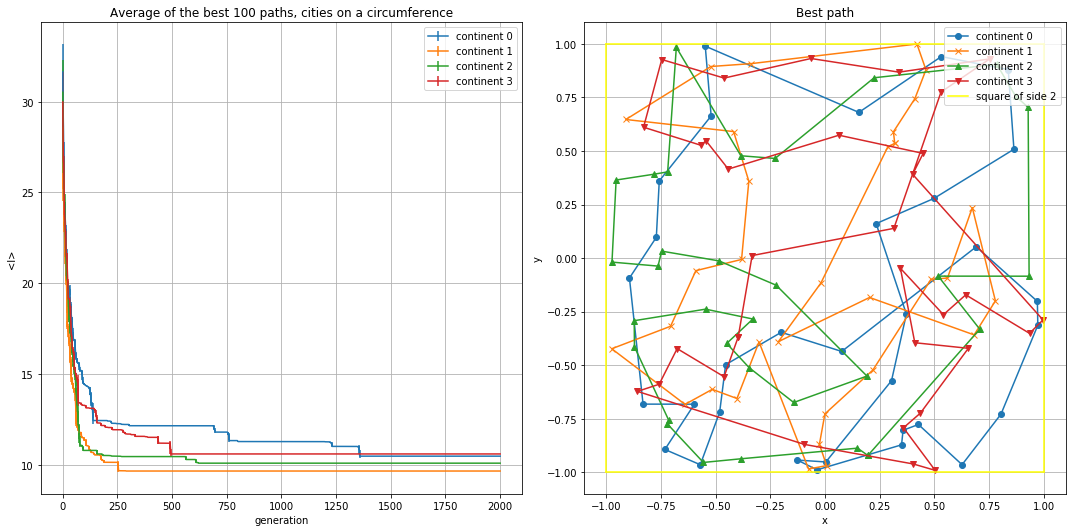

In [29]:
s_gen,s_ave_0,s_err_0=np.loadtxt("es10.2/History/0_TSP_L2_sq_ave.txt", usecols=(0,1,2), delimiter=" ", unpack='true')
s_ave_1,s_err_1=np.loadtxt("es10.2/History/1_TSP_L2_sq_ave.txt", usecols=(1,2), delimiter=" ", unpack='true')
s_ave_2,s_err_2=np.loadtxt("es10.2/History/2_TSP_L2_sq_ave.txt", usecols=(1,2), delimiter=" ", unpack='true')
s_ave_3,s_err_3=np.loadtxt("es10.2/History/3_TSP_L2_sq_ave.txt", usecols=(1,2), delimiter=" ", unpack='true')

s_x_0,s_y_0=np.loadtxt("es10.2/Best/0_TSP_L2_sq_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
s_x_1,s_y_1=np.loadtxt("es10.2/Best/1_TSP_L2_sq_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
s_x_2,s_y_2=np.loadtxt("es10.2/Best/2_TSP_L2_sq_best.txt", usecols=(1,2), delimiter=" ", unpack='true')
s_x_3,s_y_3=np.loadtxt("es10.2/Best/3_TSP_L2_sq_best.txt", usecols=(1,2), delimiter=" ", unpack='true')

plt.figure(0,figsize=(15,7.5))

plt.subplot(121)
plt.errorbar(s_gen,s_ave_0,yerr=s_err_0, label="continent 0")
plt.errorbar(s_gen,s_ave_1,yerr=s_err_1, label="continent 1")
plt.errorbar(s_gen,s_ave_2,yerr=s_err_2, label="continent 2")
plt.errorbar(s_gen,s_ave_3,yerr=s_err_3, label="continent 3")
plt.title("Average of the best 100 paths, cities on a circumference")
plt.xlabel("generation")
plt.ylabel("<l>")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(122)
x_left=np.linspace(-1,1,100)
x_right=np.linspace(-1,1,100)
for i in range(100):
    x_left[i]=-1
    x_right[i]=+1
x=np.linspace(-1,1,100)
plt.plot(s_x_0,s_y_0,'-o',label='continent 0')
plt.plot(s_x_1,s_y_1,'-x',label='continent 1')
plt.plot(s_x_2,s_y_2,'-^',label='continent 2')
plt.plot(s_x_3,s_y_3,'-v',label='continent 3')
plt.plot(x,x_left,color='yellow',label='square of side 2')
plt.plot(x,x_right,color='yellow')
plt.plot(x_right,x,color='yellow')
plt.plot(x_left,x,color='yellow')
plt.legend(loc='upper right')
plt.title("Best path")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.tight_layout()
plt.show()